This notebook demonstrates how to generate parcels using data from a group of subjects. This step is optional and can be skipped if you prefer to use an existing parcels file for subject-specific localization. In that case, you can proceed directly to step 3.

In [1]:
# Import funROI
import sys
import os
package_path = "../funROI"
sys.path.append(os.path.abspath(package_path))
import funROI
from funROI import utils, first_level, analysis

from nilearn.plotting import plot_glass_brain

In [2]:
# Set the BIDS data directories
funROI.set_bids_data_folder("./data/bids")
funROI.set_bids_deriv_folder("./data/bids/derivatives")
funROI.set_bids_preprocessed_folder("./data/bids/derivatives/fmriprep")

To add subject data to the parcel generator, the data can be localized using either a contrast or a localizer. The localizer is defined by a set of localizers, with a conjunction method specifying how their p-maps are combined. 

Use a contrast:

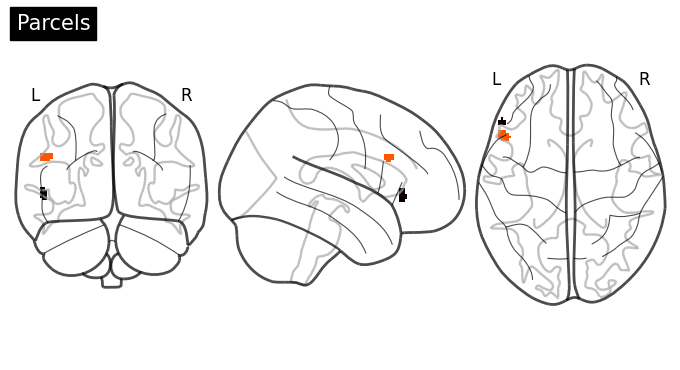

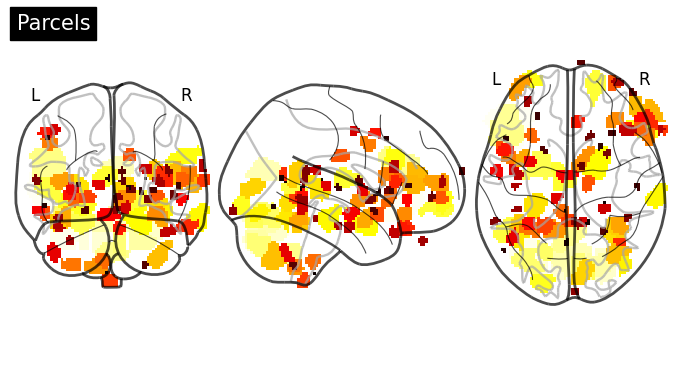

In [3]:
# with p-value correction
parcel_generator_pic_contrast = analysis.ParcelGenerator(
    threshold_type='pval_fdr', threshold_value=0.05)   
parcel_generator_pic_contrast.add_localizer(
    '040', 'EventsOrig', 'Sem_sentminusPerc_sent')
parcel_generator_pic_contrast.run()
plot_glass_brain(parcel_generator_pic_contrast.parcels, title='Parcels')

# without p-value correction
parcel_generator_pic_contrast = analysis.ParcelGenerator(
    threshold_type='pval_none', threshold_value=0.05)   
parcel_generator_pic_contrast.add_localizer(
    '040', 'EventsOrig', 'Sem_sentminusPerc_sent')
parcel_generator_pic_contrast.run()
plot_glass_brain(parcel_generator_pic_contrast.parcels, title='Parcels')

Use a localizer:

In [4]:
utils.register_localizer('040', 'EventsOrig', 
                         ['Sem_sentminusPerc_sent', 'Sem_photominusPerc_photo'], 
                         'or', 'both_sem_minus_perc_or')

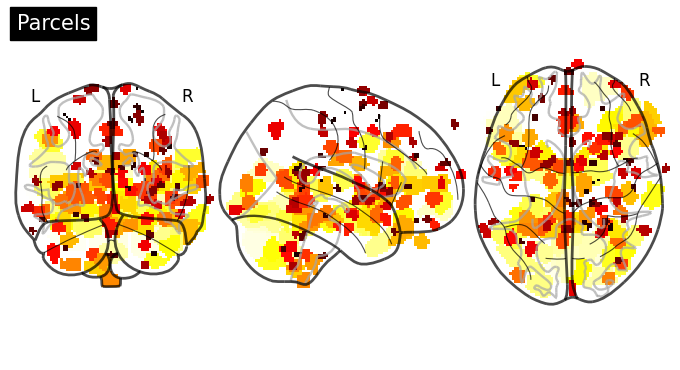

In [5]:
parcel_generator_both_contrast =  analysis.ParcelGenerator(
    threshold_type='pval_none', threshold_value=0.05)
parcel_generator_both_contrast.add_localizer(
    '040', 'EventsOrig', 'both_sem_minus_perc_or')
parcel_generator_both_contrast.run()
plot_glass_brain(parcel_generator_both_contrast.parcels, title='Parcels')

Add each subject and the corresponding localizer to set up the process:

In [6]:
# Register the localizer for 199
utils.register_localizer('199', 'Events2move', 
                         ['Sem-sentminusPerc-sent', 'Sem-photominusPerc-photo'], 
                         'or', 'both_sem_minus_perc_or')

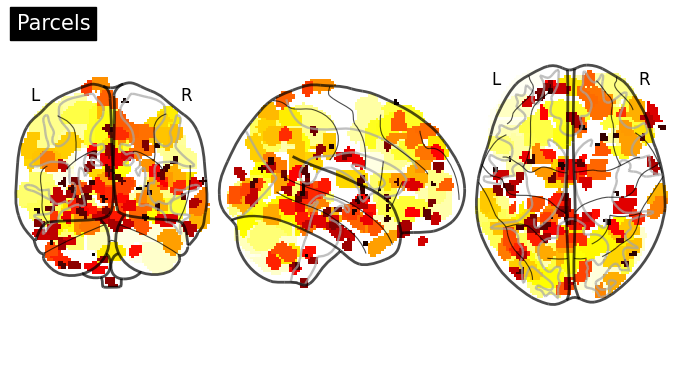

In [7]:
parcel_generator_both_contrast = analysis.ParcelGenerator(
    threshold_type='pval_none', threshold_value=0.05)
parcel_generator_both_contrast.add_localizer(
    '040', 'EventsOrig', 'both_sem_minus_perc_or')
parcel_generator_both_contrast.add_localizer(
    '199', 'Events2move', 'both_sem_minus_perc_or')
parcel_generator_both_contrast.run()
plot_glass_brain(parcel_generator_both_contrast.parcels, title='Parcels')

The following code demonstrates how to select parcels based on specific criteria. Currently, two types of criteria are supported:

- A minimum number of voxels in the parcel

- A minimum proportion of subjects with a non-zero intersection between their binary mask and the parcel

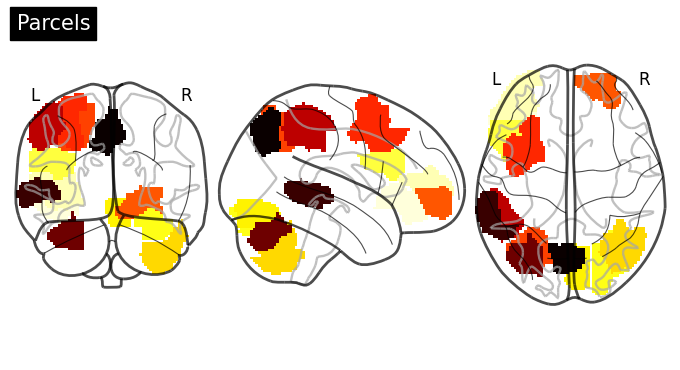

In [8]:
# Select parcels by criteria
parcel_generator_both_contrast.select_parcels(
    min_voxel_size = 1000, 
    min_prop_intersect = 0.5 
)

plot_glass_brain(parcel_generator_both_contrast.parcels, title='Parcels')

In [9]:
# Export parcels: the parcels file will be saved in the BIDS derivatives folder
parcel_generator_both_contrast.save(parcels_name='semantic_2_subjects')